In [1]:
from agents import Consumer, Producer, Influencer
from content_market import ContentMarket
import numpy as np

In [2]:
num_producers = 5
num_influencers = 0
num_consumers = 4

topics = [[1, 10]]
topics = np.array(topics)

In [3]:
content_market = ContentMarket(topics)

In [4]:
from util import exponential_decay, inverse_decay, tanh_decay

In [5]:
agent_colors = dict()

for i in range(num_producers):
    #func = lambda x: exponential_decay(x, 1)
    # func = lambda x: 1.0
    func = lambda x: inverse_decay(x, 7, 2)
    producer = Producer(func)
    content_market.add_agent(producer)
    
    color = np.random.rand(3,)
    agent_colors[producer.index] = color

for i in range(num_consumers):
    #func = lambda x: exponential_decay(x, 1)
    #func = lambda x : 1.0
    func = lambda x: inverse_decay(x, 7, 2)
    consumer = Consumer(func, 1, .1, 1)
    content_market.add_agent(consumer)

    color = np.random.rand(3,)
    agent_colors[consumer.index] = color

In [6]:
import matplotlib.pyplot as plt

In [7]:
content_market.finalize(method='random')

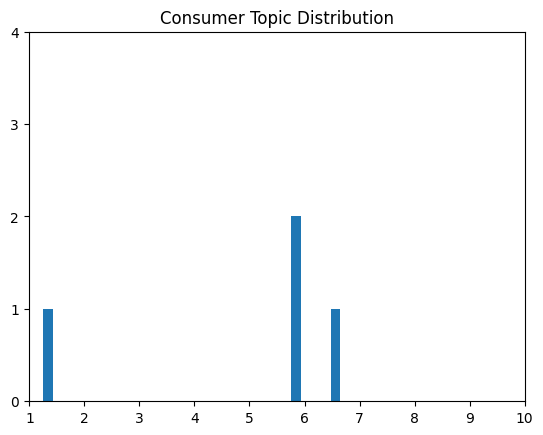

In [8]:
plt.figure()
plt.title("Consumer Topic Distribution")
plt.hist([c.main_interest[0] for c in content_market.consumers], bins=30)
plt.yticks(range(0, num_consumers + 1))
plt.xticks(range(1, 11))
plt.show()

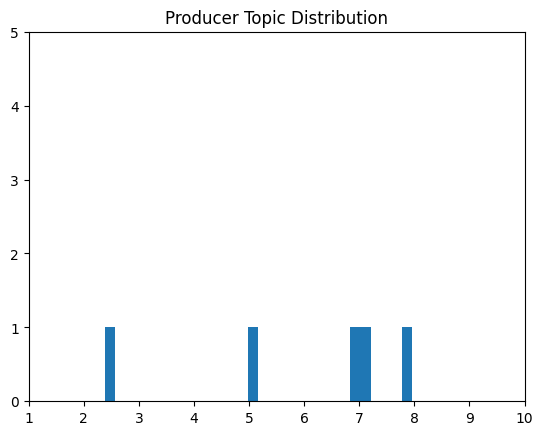

In [9]:
plt.figure()
plt.title("Producer Topic Distribution")
plt.hist([p.main_interest[0] for p in content_market.producers], bins=30)
plt.yticks(range(0, num_producers + 1))
plt.xticks(range(1, 11))
plt.show()

In [10]:
consumer_stats, influencer_stats, producer_stats, total_stats, average_stats = content_market.optimize(1, 1, 100)

Iteration 0 / 100 done.
Total Social Welfare: 2.119803641120436
Iteration 1 / 100 done.
Total Social Welfare: 2.175847335649548
Consumer rate change: 0.0
Consumer utility change: 0.014010923632278016
Producer topic change: 0.0
Producer utility change: 0.0
Converged.


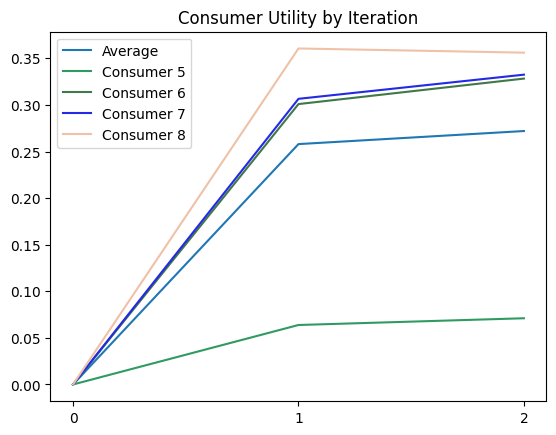

In [11]:
plt.figure()
plt.title("Consumer Utility by Iteration")
#plt.plot(total_stats['consumer_utilities'], label="Total")
plt.plot(average_stats['consumer_utilities'], label="Average")
for consumer in content_market.consumers:
    plt.plot(consumer_stats[consumer.index]['utilities'], label="Consumer {}".format(consumer.index), color=agent_colors[consumer.index])
plt.legend()
plt.xticks(range(len(average_stats['consumer_utilities'])))
plt.show()

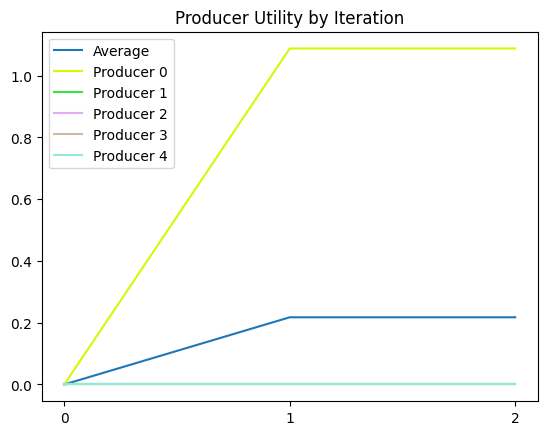

In [12]:
plt.figure()
plt.title("Producer Utility by Iteration")
#plt.plot(total_stats['producer_utilities'], label="Total")
plt.plot(average_stats['producer_utilities'], label="Average")
for producer in content_market.producers:
    plt.plot(producer_stats[producer.index]['utilities'], label='Producer {}'.format(producer.index), color=agent_colors[producer.index])
plt.legend()
plt.xticks(range(len(average_stats['producer_utilities'])))
plt.show()

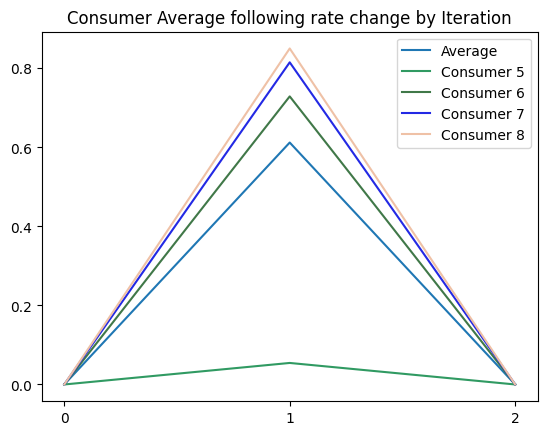

In [13]:
plt.figure()
plt.title("Consumer Average following rate change by Iteration")
plt.plot(average_stats['consumer_rate_change'], label='Average')
for consumer in content_market.consumers:
    plt.plot(consumer_stats[consumer.index]['rate_change'], label='Consumer {}'.format(consumer.index), color=agent_colors[consumer.index])
plt.legend()
plt.xticks(range(len(average_stats['consumer_rate_change'])))
plt.show()

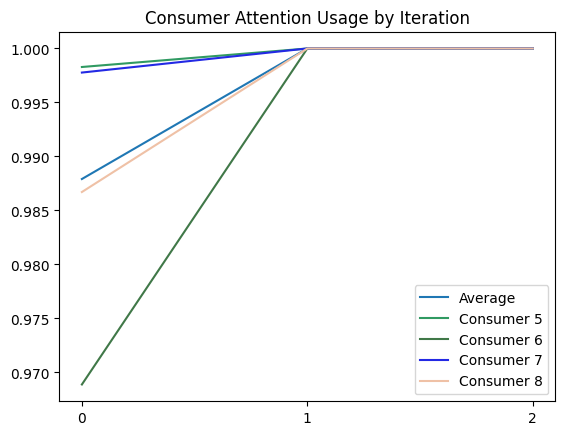

In [14]:
plt.figure()
plt.title("Consumer Attention Usage by Iteration")
plt.plot(average_stats['consumer_attention_used'], label='Average')
for consumer in content_market.consumers:
    plt.plot(consumer_stats[consumer.index]['attention_used'], label='Consumer {}'.format(consumer.index), color=agent_colors[consumer.index])
plt.legend()
plt.xticks(range(len(average_stats['consumer_attention_used'])))
plt.show()

In [15]:
consumer_stats

{5: {'following_rates': [array([9.53832673e-01, 2.13232589e-02, 1.93356384e-02, 2.81265420e-04,
          2.52272267e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 9.89516907e-04]),
   array([1.00000000e+00, 3.90854883e-17, 5.69743623e-17, 0.00000000e+00,
          1.57767145e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 2.60400540e-17]),
   array([1.00000000e+00, 3.90854883e-17, 5.69743623e-17, 0.00000000e+00,
          1.57767145e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 2.60400540e-17])],
  'utilities': [0, 0.06383137166214997, 0.07106418107907642],
  'rate_change': [0, 0.05447378077327764, 0.0],
  'attention_used': [0.9982850748716089,
   1.0000000000000002,
   1.0000000000000002]},
 6: {'following_rates': [array([0.37628745, 0.28979968, 0.2375256 , 0.0037361 , 0.02200746,
          0.        , 0.        , 0.        , 0.        , 0.03953332]),
   array([1.00000000e+00, 2.16493490e-

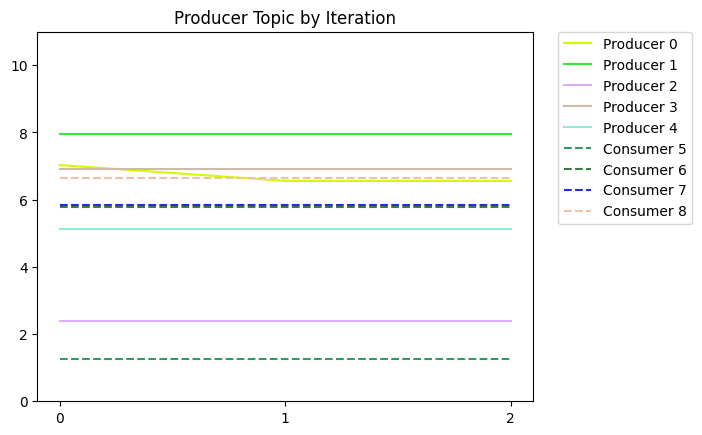

In [16]:
plt.figure()
plt.title("Producer Topic by Iteration")
for producer in content_market.producers:
    plt.plot(producer_stats[producer.index]['topics'], label='Producer {}'.format(producer.index), color=agent_colors[producer.index])
for consumer in content_market.consumers:
    plt.plot([consumer.main_interest] * len(producer_stats[producer.index]['topics']), label='Consumer {}'.format(consumer.index), linestyle='--', color=agent_colors[consumer.index])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(topics[0][0] - 1, topics[0][1] + 1)
plt.xticks(range(len(producer_stats[producer.index]['topics'])))
plt.show()

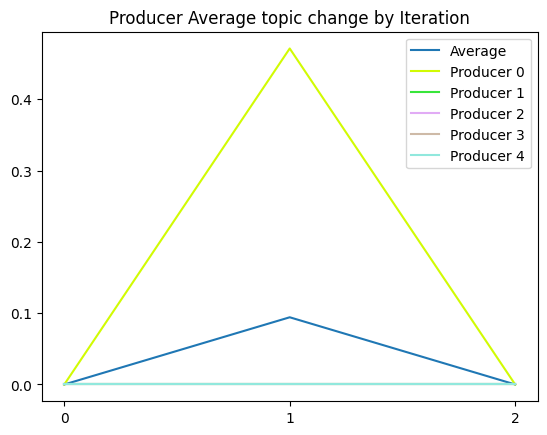

In [17]:
plt.figure()
plt.title("Producer Average topic change by Iteration")
plt.plot(average_stats['producer_topic_change'], label='Average')
for producer in content_market.producers:
    plt.plot(producer_stats[producer.index]['topic_change'], label='Producer {}'.format(producer.index), color=agent_colors[producer.index])
plt.legend()
plt.xticks(range(len(average_stats['producer_topic_change'])))
plt.show()

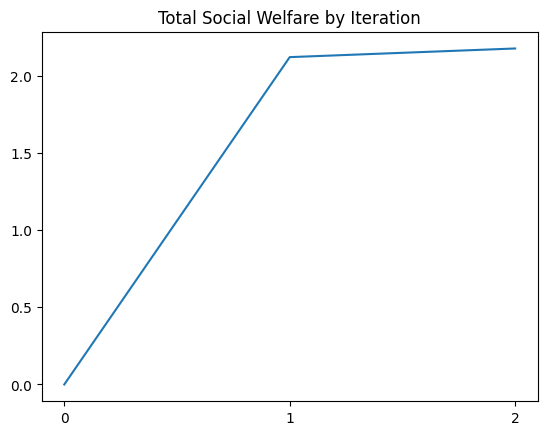

In [18]:
plt.figure()
plt.title("Total Social Welfare by Iteration")
plt.plot(total_stats['social_welfare'], label="Total")
plt.xticks(range(len(total_stats['social_welfare'])))
plt.show()

In [19]:
import numpy as np

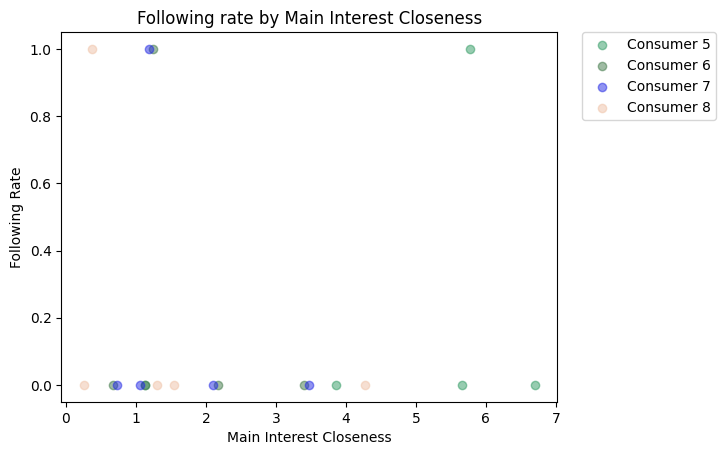

In [20]:
plt.figure()
plt.title("Following rate by Main Interest Closeness")
plt.xlabel("Main Interest Closeness")
plt.ylabel("Following Rate")
for consumer in content_market.consumers:
    interest_closeness = []
    following_rate = []
    for producer in content_market.producers:
        ending_rate = consumer_stats[consumer.index]['following_rates'][-1][producer.index]
        interest_closeness.append(np.linalg.norm(consumer.main_interest - producer.main_interest))
        following_rate.append(ending_rate)
    plt.scatter(interest_closeness, following_rate, color=agent_colors[consumer.index], alpha=0.5, label='Consumer {}'.format(consumer.index))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

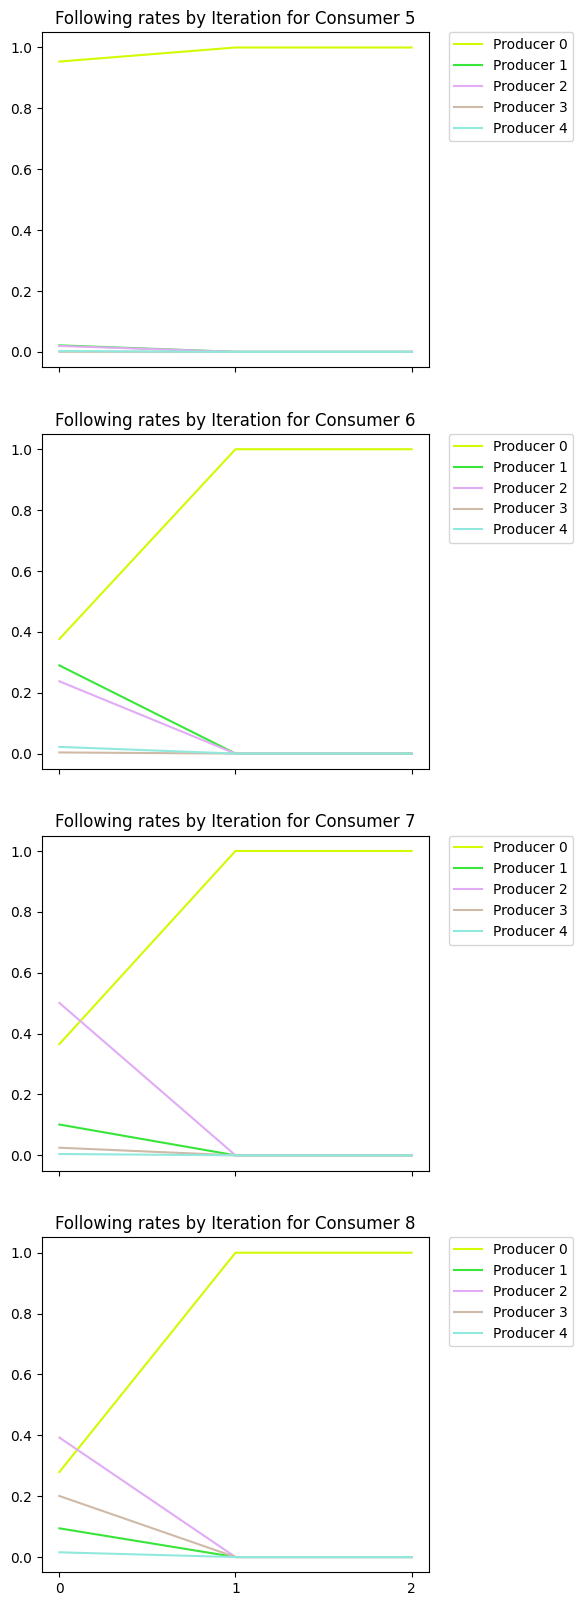

In [21]:
fig = plt.figure(figsize=(5, 20))
for i, consumer in enumerate(content_market.consumers):
    ax = fig.add_subplot(num_consumers, 1, i + 1)
    ax.set_title(f"Following rates by Iteration for Consumer {consumer.index}")
    for producer in content_market.producers:
        rate_by_iteration = [vec[producer.index] for vec in consumer_stats[consumer.index]['following_rates']]
        ax.plot(rate_by_iteration, label='Producer {}'.format(producer.index), color=agent_colors[producer.index])
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set_xticks(range(len(rate_by_iteration)))
    ax.sharex(fig.axes[0])
    ax.label_outer()
    

#fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#fig.subplots_adjust(hspace=1)
plt.show()